## 7324 Assignment A3 : KNN vs DT
##### Name: Thang Nguyen
##### SMU ID: 48689334

## Imports

In [404]:
# The Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Data Wrangling Tool
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Foundational libraries
import pandas as pd
import numpy as np

## Utility Functions

In [405]:
def display_confusion_matrix(title: str, background: str, y_test: list, y_predict: list, classes: list):
    matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict, labels=classes), display_labels=classes)
    matrix.plot()
    plt.xlabel('Predicted Label', color=background)
    plt.ylabel('True Label', color=background)
    plt.title(title)
    plt.show()

## Loading dataset

In [406]:
bio_df = pd.read_csv("../data/a3.biodata.csv")
# check for nulls 
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   f1        210 non-null    float64
 1   f2        210 non-null    float64
 2   f3        210 non-null    float64
 3   f4        210 non-null    float64
 4   f5        210 non-null    float64
 5   f6        210 non-null    float64
 6   f7        210 non-null    float64
 7   category  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [407]:
# short preview for later scaling
bio_df.head()

,f1,f2,f3,f4,f5,f6,f7,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [408]:
# separate features from target
features = bio_df.drop('category', axis=1)
target = bio_df['category']

## All Features: KNN

In [409]:
knn_X = features
knn_y = target

# split data into training and test sets
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, stratify = knn_y, random_state = 0, train_size = 0.8)

In [410]:
# instantiate classifier with default 5 neighbors and 1 jobs
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=1)

In [411]:
# fit on training set
knn.fit(knn_X_train, knn_y_train)
# test on test set
knn_y_predict = knn.predict(knn_X_test)

In [412]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(knn_y_test, knn_y_predict))
print(classification_report(knn_y_test, knn_y_predict))
print(confusion_matrix(knn_y_test, knn_y_predict, labels=knn.classes_))

0.9285714285714286
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.93      1.00      0.97        14
           3       0.88      1.00      0.93        14

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42

[[11  1  2]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting KNN Confusion Matrix

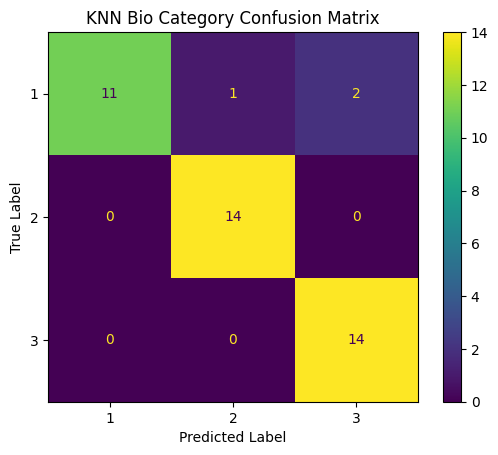

In [413]:
display_confusion_matrix('KNN Bio Category Confusion Matrix', 'black', knn_y_test, knn_y_predict, knn.classes_)

## All Features w/Scaling: KNN

In [414]:
# scale features
scaler = StandardScaler()
knn_X_train_scaled = scaler.fit_transform(knn_X_train)
knn_X_test_scaled = scaler.fit_transform(knn_X_test)

In [415]:
# fit on scaled training set
knn.fit(knn_X_train_scaled, knn_y_train)
# test on scaled test set
knn_y_predict = knn.predict(knn_X_test_scaled)

In [416]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(knn_y_test, knn_y_predict))
print(classification_report(knn_y_test, knn_y_predict))
print(confusion_matrix(knn_y_test, knn_y_predict))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

[[14  0  0]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

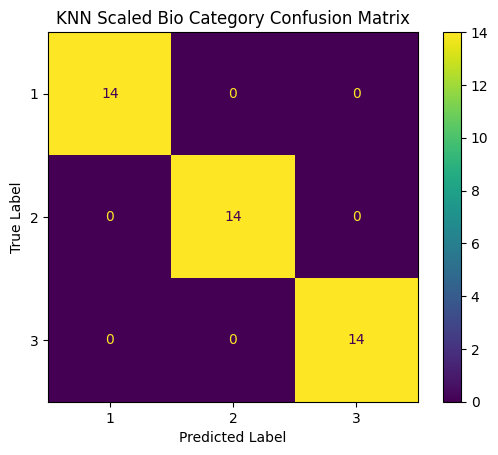

In [417]:
display_confusion_matrix('KNN Scaled Bio Category Confusion Matrix', 'black', knn_y_test, knn_y_predict, knn.classes_)

## Some Features Removed: KNN 
### Removed features were determined through trial and error

In [418]:
# removing f1 and f2 
bio_df_2 = bio_df.drop(['f1', 'f2'], axis=1)

# separate features from target
features = bio_df_2.drop('category', axis=1)
target = bio_df_2['category']

In [419]:
knn_X = features
knn_y = target

# split data into training and test sets
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, stratify = knn_y, random_state = 0, train_size = 0.8)

In [420]:
# instantiate classifier with default 5 neighbors and 1 jobs
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=1)

In [421]:
# fit on training set
knn.fit(knn_X_train, knn_y_train)
# test on test set
knn_y_predict = knn.predict(knn_X_test)

In [422]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(knn_y_test, knn_y_predict))
print(classification_report(knn_y_test, knn_y_predict))
print(confusion_matrix(knn_y_test, knn_y_predict))

0.9761904761904762
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        14

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

[[13  1  0]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

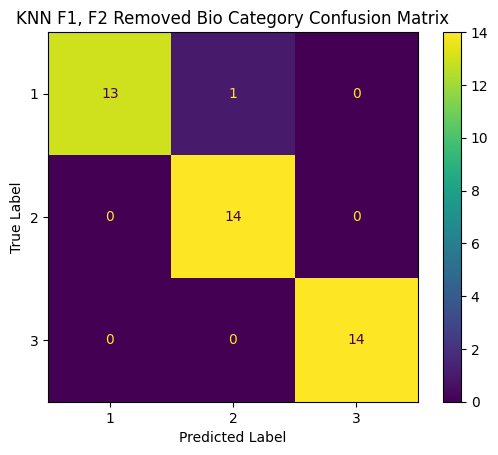

In [423]:
display_confusion_matrix('KNN F1, F2 Removed Bio Category Confusion Matrix', 'black', knn_y_test, knn_y_predict, knn.classes_)

## Some Features Removed w/Scaling: KNN

In [424]:
# scale features
scaler = StandardScaler()
knn_X_train_scaled = scaler.fit_transform(knn_X_train)
knn_X_test_scaled = scaler.fit_transform(knn_X_test)

In [425]:
# fit on scaled training set
knn.fit(knn_X_train_scaled, knn_y_train)
# test on scaled test set
knn_y_predict = knn.predict(knn_X_test_scaled)

In [426]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(knn_y_test, knn_y_predict))
print(classification_report(knn_y_test, knn_y_predict))
print(confusion_matrix(knn_y_test, knn_y_predict))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

[[14  0  0]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

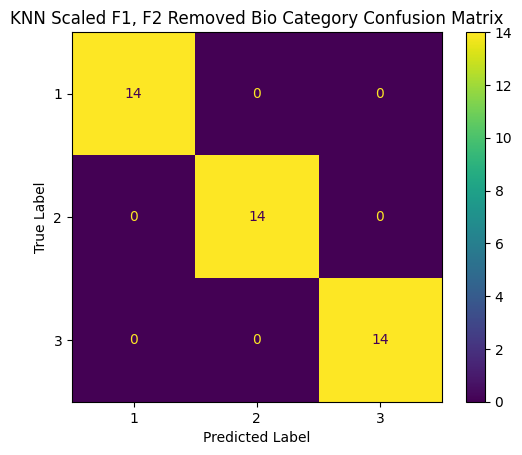

In [427]:
display_confusion_matrix('KNN Scaled F1, F2 Removed Bio Category Confusion Matrix', 'black', knn_y_test, knn_y_predict, knn.classes_)

## All Features: Decision Trees

### Resetting bio_data

In [428]:
bio_df = pd.read_csv("../data/a3.biodata.csv")

In [429]:
# separate features from target
features = bio_df.drop('category', axis=1)
target = bio_df['category']

In [430]:
dt_X = features
dt_y = target

# split data into training and test sets
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, stratify = dt_y, random_state = 0, train_size = 0.8)

In [431]:
dt = DecisionTreeClassifier(random_state=0)

In [432]:
# fit on training set
dt.fit(dt_X_train, dt_y_train)
# test on test set
dt_y_predict = dt.predict(dt_X_test)

In [433]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(dt_y_test, dt_y_predict))
print(classification_report(dt_y_test, dt_y_predict))
print(confusion_matrix(dt_y_test, dt_y_predict))

0.9285714285714286
              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       1.00      1.00      1.00        14
           3       0.87      0.93      0.90        14

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

[[12  0  2]
 [ 0 14  0]
 [ 1  0 13]]


### Plotting Confusion Matrix

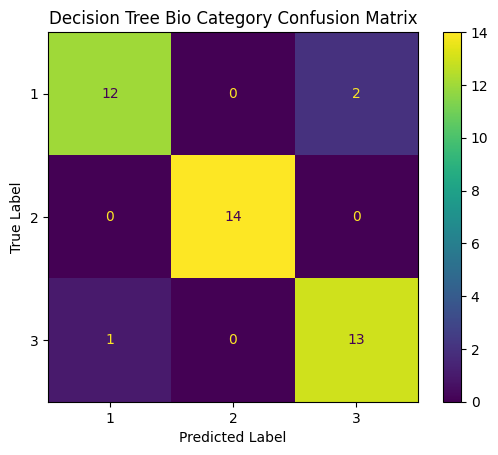

In [434]:
display_confusion_matrix('Decision Tree Bio Category Confusion Matrix', 'black', dt_y_test, dt_y_predict, dt.classes_)

## All Features w/Scaling: Decision Trees

In [435]:
# scale features
scaler = StandardScaler()
dt_X_train_scaled = scaler.fit_transform(dt_X_train)
dt_X_test_scaled = scaler.fit_transform(dt_X_test)

In [436]:
# fit on scaled training set
dt.fit(dt_X_train_scaled, dt_y_train)
# test on scaled test set
dt_y_predict = dt.predict(dt_X_test_scaled)

In [437]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(dt_y_test, dt_y_predict))
print(classification_report(dt_y_test, dt_y_predict))
print(confusion_matrix(dt_y_test, dt_y_predict))

0.9761904761904762
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14
           3       0.93      1.00      0.97        14

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

[[13  0  1]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

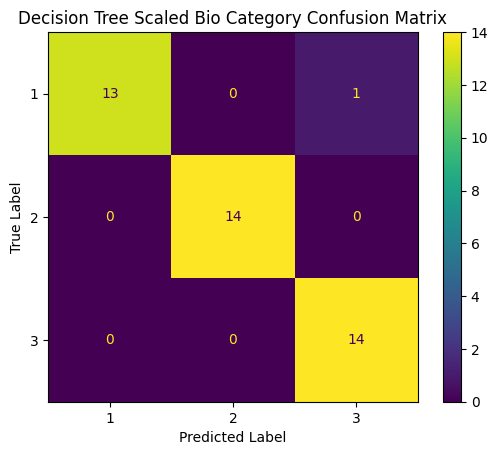

In [438]:
display_confusion_matrix('Decision Tree Scaled Bio Category Confusion Matrix', 'black', dt_y_test, dt_y_predict, dt.classes_)

## Some Features: Decision Trees

In [439]:
# removing f2 
bio_df_3 = bio_df.drop(['f2'], axis=1)

# separate features from target
features = bio_df_3.drop('category', axis=1)
target = bio_df_3['category']

In [440]:
dt_X = features
dt_y = target

# split data into training and test sets
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, stratify = dt_y, random_state = 0, train_size = 0.8)

In [441]:
dt = DecisionTreeClassifier(random_state=0)

In [442]:
# fit on training set
dt.fit(dt_X_train, dt_y_train)
# test on test set
dt_y_predict = dt.predict(dt_X_test)

In [443]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(dt_y_test, dt_y_predict))
print(classification_report(dt_y_test, dt_y_predict))
print(confusion_matrix(dt_y_test, dt_y_predict))

0.9523809523809523
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        14
           3       0.88      1.00      0.93        14

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

[[12  0  2]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

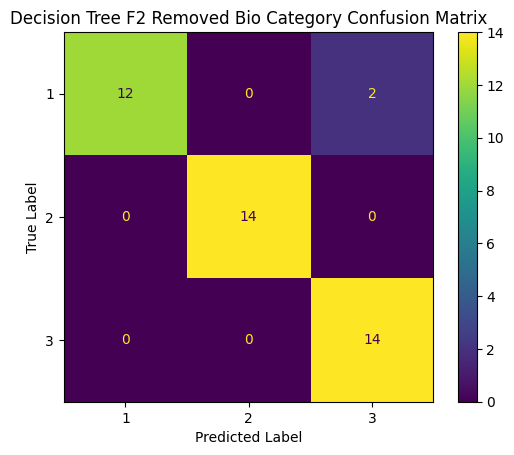

In [444]:
display_confusion_matrix('Decision Tree F2 Removed Bio Category Confusion Matrix', 'black', dt_y_test, dt_y_predict, dt.classes_)

## Some Features w/Scalling: Decision Trees

In [445]:
# scale features
scaler = StandardScaler()
dt_X_train_scaled = scaler.fit_transform(dt_X_train)
dt_X_test_scaled = scaler.fit_transform(dt_X_test)

In [446]:
# fit on scaled training set
dt.fit(dt_X_train_scaled, dt_y_train)
# test on scaled test set
dt_y_predict = dt.predict(dt_X_test_scaled)

In [447]:
# observing accuracy, precision, and confusion matrix
print(accuracy_score(dt_y_test, dt_y_predict))
print(classification_report(dt_y_test, dt_y_predict))
print(confusion_matrix(dt_y_test, dt_y_predict))

0.9761904761904762
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        14
           3       0.93      1.00      0.97        14

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

[[13  0  1]
 [ 0 14  0]
 [ 0  0 14]]


### Plotting Confusion Matrix

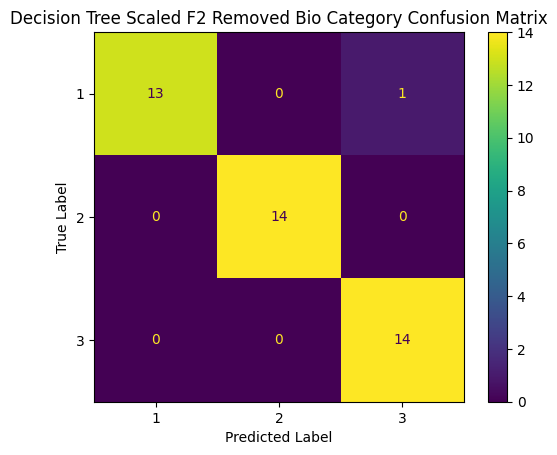

In [448]:
display_confusion_matrix('Decision Tree Scaled F2 Removed Bio Category Confusion Matrix', 'black', dt_y_test, dt_y_predict, dt.classes_)